In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
## Testing how matmul works

# Set the variables
mat_1 = np.array([[1, 2], 
                  [3, 4]])
mat_2 = np.array([[5, 6], 
                  [7, 8]])
vec_1 = np.array([7, 8])

# Element-wise multiplication
result = mat_1 * mat_2
print(result)  # element-wise
print(result[1, :])
# Linear algebra matrix multiplication - These are the same
result = mat_1 @ mat_2  # proper mat-mul
result2 = np.matmul(mat_1, mat_2)
  

# Vector and matrix multiplication - Doesn't matter if the vector is transposed
result = np.matmul(vec_1, (mat_1 * mat_2))
print(result)
result2 = np.matmul(vec_1.T, (mat_1 * mat_2))
print(result2)

[[ 5 12]
 [21 32]]
[21 32]
[203 340]
[203 340]


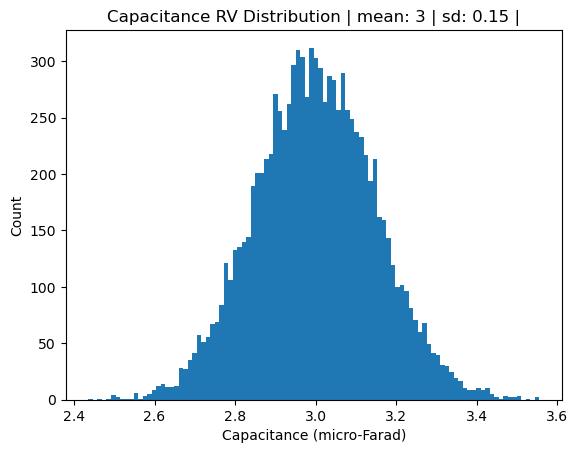

In [89]:
## LIF Model capacitance random-variable

# Set variables
norm_mean = 3
norm_sd = 0.05 * norm_mean
n_samples = 10000
n_bins = 100

# Generate distribution
capacitance_rv = np.random.normal(loc=norm_mean, 
                                 scale=norm_sd, 
                                 size=n_samples)

# Plot the variables
fig, ax = plt.subplots()
ax.hist(capacitance_rv, bins=n_bins)
ax.set_title(f"Capacitance RV Distribution | mean: {norm_mean} | sd: {round(norm_sd, 3)} |")
ax.set_ylabel("Count")
ax.set_xlabel("Capacitance (micro-Farad)")
plt.show()
plt.close()

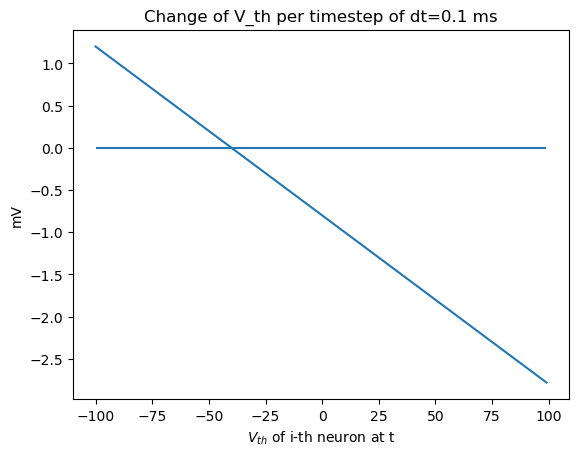

In [125]:
## Testing Dynatmic threshold function

# Set variables
v_th_rest = -40  # mV
dt = 0.1  # ms
tau_th = 5  # ms

# Calculating the delta V_th
v_th = np.array(range(-100, 100, 1))
del_v_th = (v_th_rest - v_th) * (dt / tau_th)

# Plot
fig, ax = plt.subplots()
ax.plot(v_th, del_v_th)
ax.hlines(y=0, xmin=min(v_th), xmax=max(v_th))
ax.set_title(f"Change of V_th per timestep of dt={dt} ms")
ax.set_xlabel(r"$V_{th}$ of i-th neuron at t")
ax.set_ylabel("mV")
plt.show()
plt.close()


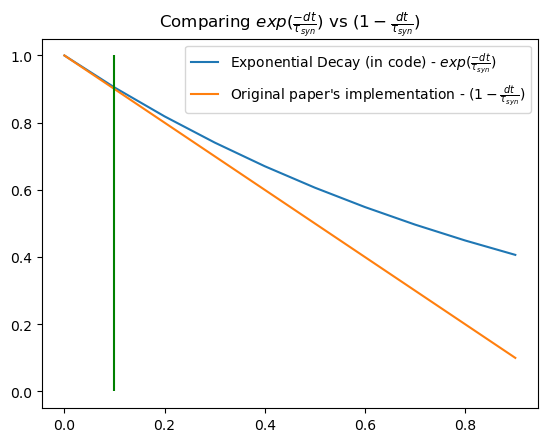

y1 - y2 at dt=0.1: 0.004837418035959495


In [113]:
# Difference between exp(-dt/tau_syn) vs (1-dt/tau_syn)

# Set variables
tau_syn = 1  # Synapse timescale [ms]
dt = np.arange(0, 1, 0.1)

y1 = np.exp(-dt/tau_syn)  # "Exponential Decay" as implemented in the code by Matteo
y2 = (1 - dt/tau_syn)  # Original paper's implementation (potential incorrect translation)

# Plot
fig, ax = plt.subplots()
ax.plot(dt, y1, label=r"Exponential Decay (in code) - $exp(\frac{-dt}{\tau_{syn}})$")
ax.plot(dt, y2, label=r"Original paper's implementation - $(1 - \frac{dt}{\tau_{syn}})$")
ax.vlines(x=0.1, ymin=0, ymax=1, colors="green")
ax.set_title(r"Comparing $exp(\frac{-dt}{\tau_{syn}})$ vs $(1 - \frac{dt}{\tau_{syn}})$")
plt.legend()
plt.show()

# Calculate y1 and y2 difference at dt=0.1
dt = 0.1
y1 = np.exp(-dt/tau_syn)
y2 = (1 - dt/tau_syn) 
print(f"y1 - y2 at dt=0.1: {y1-y2}")

# NOTE (Tony): 
# - As seen below, when dt=0.1, the differences between the y1 and y2 is very
#   thus, the implementation of the exponential decay in the code doesn't make
#   too much of a difference (until we see later on when calculating the 
#   synaptic_conductance).
# - Thus, if the exponential decay was attempting to implemented something as 
#   the gradual change in neuron membrance potential when a current is injected, 
#   this implementation of "exponential decay" is incorrect.
# - The original paper's implementation already has exponential decay in change
#   and thus doesn't need the "exponential decay" as implemented for y1.


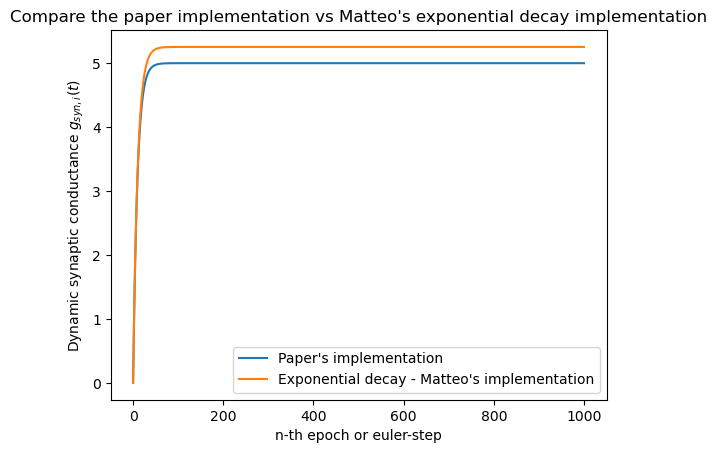

In [117]:
## Testing the dynamic conductance function from the paper

# Helper functions
# Paper implementation - dynamic conductance calculation
def euler_g_syn(g_syn = 0, connected_spiked_w_sum = 0.5):
    return (1-0.1/1) * g_syn + connected_spiked_w_sum
# "Exponential Decay" implementation - Added by Matteo
def euler_g_syn_exp_decay(g_syn = 0, connected_spiked_w_sum = 0.5):
    return np.exp(-0.1/1) * g_syn + connected_spiked_w_sum

# Tracker variables
track_g_syn = [0]
track_g_syn_exp_decay = [0]
n_epoch = 1000

# Run calculations
for i in range(n_epoch):
    next_epoch_value = euler_g_syn(track_g_syn[i])
    track_g_syn.append(next_epoch_value)
for i in range(n_epoch):
    next_epoch_value = euler_g_syn_exp_decay(track_g_syn_exp_decay[i])
    track_g_syn_exp_decay.append(next_epoch_value)


# Plot
fig, ax = plt.subplots()
ax.plot(track_g_syn, label="Paper's implementation")
ax.plot(track_g_syn_exp_decay, label="Exponential decay - Matteo's implementation")
ax.set_title("Compare the paper implementation vs Matteo's exponential decay implementation")
ax.set_xlabel("n-th epoch or euler-step")
ax.set_ylabel(r"Dynamic synaptic conductance $g_{syn, i}(t)$")
plt.legend()

# NOTE (Tony): 
# - As mentioned above, even though the difference between these two 
#   implementations are minimal, the values can add up and as we seen here that
#   the synaptic conductance is consistently higher than the paper's 
#   implementation.
# - Additionally, exponential decay the change is already incorporated into the 
#   functions stated by the paper, thus, there is no need to add the decay.
# - Unless, I mis-understood what the attempt of implementing exponential decay
#   was for by Matteo.

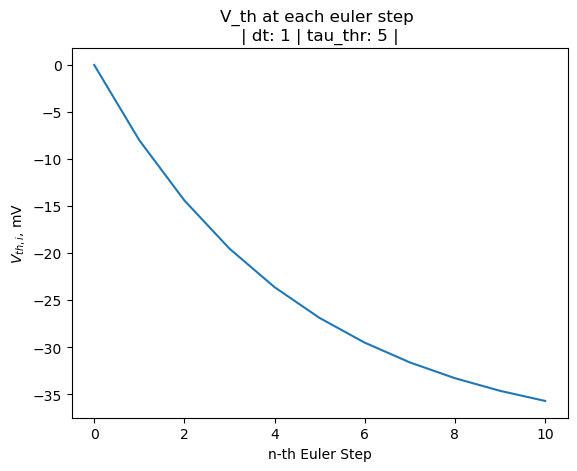

In [144]:
## Testing the voltage_threshold_function generation from the paper

# Set variables
track_v_th = [0]
n_euler_steps = 10
v_th_starting_value = 0
tau_thr = 5  # 5 ms
dt = 1

# Helper function
def euler_v_th(v_th = v_th_starting_value): 
    return v_th + (-40 - v_th) * (dt/tau_thr)

# Euler steps simulation
for i in range(n_euler_steps): 
    result = euler_v_th(track_v_th[i])
    track_v_th.append(result)

# Plot
fig, ax = plt.subplots()
ax.plot(track_v_th, label="Voltage spike threshold [mV]")
ax.set_title(f"V_th at each euler step \n| dt: {dt} | tau_thr: {tau_thr} |")
ax.set_ylabel(r"$V_{th, i}$, mV")
ax.set_xlabel("n-th Euler Step")
plt.show()

# NOTE (Tony): 
# - As seen above, the function from the paper DOES generate an 
#   exponentially decaying potential threshold. After each spike, the threshold
#   is reset to 0mV.

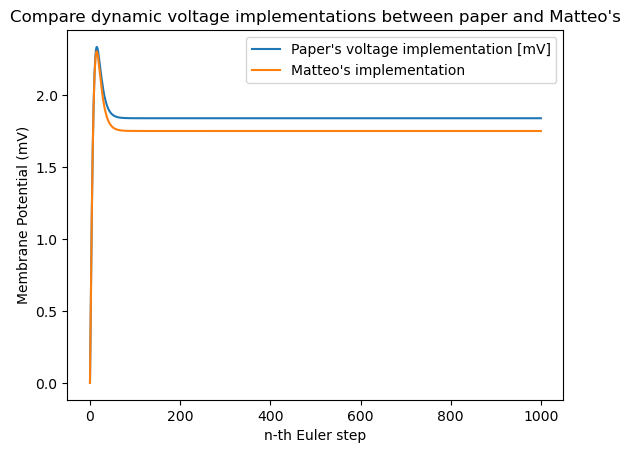

In [134]:
## Testing if the membrane potential is also exponentially decaying

# Set variables
g_leak = 0.02  # mS/cm**2
v_rest = -38  # mV
v_syn = 0  # [mV] reversal potential
# I_stim and I_noise are intentially set to zero for now
I_stim = 10
I_noise = 0
capa_norm_mean = 3  # micro-Farad / cm**2 - Set by the paper
capa_norm_sd = capa_norm_mean * 0.05  # Set by the paper
n_euler_steps = 1000
dt = 0.1
capacitance = np.random.normal(loc=capa_norm_mean, scale=capa_norm_sd, size=n_euler_steps)
track_v = [0]  # Paper's implementation
track_v_2 = [0]  # Matteo's "exponential decay" implementation

#
for i in range(n_euler_steps):
    result_1 = (track_v[i] + 
               (dt/capacitance[i])*
                 (g_leak*(v_rest-track_v[i]) + 
                  track_g_syn[i]*(v_syn-track_v[i]) +
                  I_stim + I_noise))
    track_v.append(result_1)
    
    result_2 = (track_v_2[i] + 
               (dt/capacitance[i])*
                 (g_leak*(v_rest-track_v_2[i]) + 
                  track_g_syn_exp_decay[i]*(v_syn-track_v_2[i]) +
                  I_stim + I_noise))
    track_v_2.append(result_2)

# Plot
fig, ax = plt.subplots()
ax.plot(track_v, label="Paper's voltage implementation [mV]")
ax.plot(track_v_2, label="Matteo's implementation")
# ax.plot(track_v_th, label="Voltage spike threshold [mV]")
ax.set_title("Compare dynamic voltage implementations between paper and Matteo's")
ax.set_ylabel("Membrane Potential (mV)")
ax.set_xlabel("n-th Euler step")
plt.legend()
plt.show()



Mean: 150.28229659382734
Stdev: 7.965188780507896


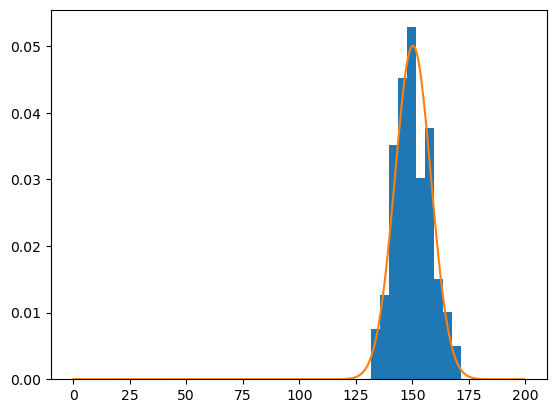

In [158]:
from scipy.stats import norm

n_neurons = 100

tau_c1 = np.sqrt(-2 * np.log(np.random.random(size=(n_neurons,))))                 # ???membrane time-constant component 1 ???
tau_c2 = np.cos(2 * np.pi * np.random.random(size=(n_neurons,)))                   # ???membrane time-constant component 2 ???                                           
tau_m = 7.5 * tau_c1 * tau_c2 + 150                                                # [ms] Membrane time-constant

# plt.plot(tau_c1)
# plt.plot(tau_c2)
# plt.plot(tau_m)

# Normal distribution
print(f"Mean: {np.mean(tau_m)}")
print(f"Stdev: {np.std(tau_m)}")
x = np.arange(start=0, stop=200, step=0.5)
norm_pdf = norm.pdf(x, loc=np.mean(tau_m), scale=np.std(tau_m))

plt.hist(tau_m, density=True)
plt.plot(x, norm_pdf)



In [159]:
# Testing list unpacking
dimension = [0, 1]
np.random.uniform(*dimension, size=5)

array([0.85112344, 0.84349182, 0.30685725, 0.47405445, 0.25405732])

In [4]:
# Testing numpy poisson RV generator
rv = np.random.poisson(lam=5, size=50000)
# plt.hist(rv, bins=50)
rv

array([6, 3, 1, ..., 8, 8, 7])

In [2]:
import numpy as np

n_neurons = 5
proba_conn = 0.07
mean_w = 0.5

pc = np.random.random(size=(n_neurons,n_neurons))  # Connectivity probability matrix
network_conn = pc < proba_conn  # Mask - Check if the connectivity probability meets the threshold `proba_conn`
network_W = np.random.random(size=(n_neurons,n_neurons))  # Connectivity weight matrix
# == FALSE; mark connections lower than probability of presynaptic connection as 0
network_W[network_conn == 0] = 0
# Normalized to mean conductance (i.e., `mean_w`)
network_W = (network_W * 
                    (mean_w / np.mean(network_W[network_W > 0])))          
# network_W[network_W > 1] = 1
# network_W[network_W < 0] = 0

print(network_W)

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.49917117 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.50082883]
 [0.         0.         0.         0.         0.        ]]


In [2]:
import numpy as np
# np.zeros((5, ))
np.zeros([5, ])

array([0., 0., 0., 0., 0.])

In [6]:
temp = np.random.random((5, 5))
print(temp)
print(temp[3, :])

[[0.05803321 0.64791168 0.2867355  0.22946086 0.87663818]
 [0.16280287 0.95405552 0.98291747 0.48284497 0.22533757]
 [0.78352372 0.89371789 0.02986431 0.51013329 0.18153663]
 [0.34005517 0.1626161  0.57442073 0.12917628 0.38924275]
 [0.31104652 0.98498114 0.08984014 0.98369973 0.5111807 ]]
[0.34005517 0.1626161  0.57442073 0.12917628 0.38924275]


In [7]:
np.exp(-0.1/1)

0.9048374180359595

In [8]:
import numpy as np
print(np.exp(-0.1/1))

print(0.1/1)


0.9048374180359595
0.1


In [1]:
temp = np.random.poisson(lam=5, size=1000)
print(temp)

NameError: name 'np' is not defined

In [2]:
temp_dict = {}

class basicObject():
    def __init__(self, name):
        self.name = name
    def printName(self):
        print(self.name)

for i in range(5): 
    name = f"item{i}"
    temp_dict[name] = basicObject(f"Tommy{i}")

temp_dict["item1"].printName()


Tommy1


In [5]:
import numpy as np

conn_mat = np.random.choice([0, 1], size=(5, 5))
w_mat = np.random.random(size=(5, 5))

print(conn_mat)
print(w_mat)

print(conn_mat * w_mat)

print()

print(np.mean(conn_mat * w_mat))
print(np.mean(w_mat[conn_mat]))

[[1 0 0 1 0]
 [1 0 0 1 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]]
[[0.71912137 0.68186583 0.40892312 0.60998848 0.14999874]
 [0.02301666 0.62057409 0.84232979 0.76966353 0.32720089]
 [0.95446407 0.19752283 0.69205563 0.21073765 0.10451536]
 [0.88858745 0.20244441 0.054685   0.56973797 0.87521306]
 [0.08844523 0.58782786 0.90094751 0.37875966 0.04396354]]
[[0.71912137 0.         0.         0.60998848 0.        ]
 [0.02301666 0.         0.         0.76966353 0.32720089]
 [0.         0.         0.69205563 0.         0.        ]
 [0.         0.         0.         0.         0.87521306]
 [0.         0.         0.90094751 0.         0.        ]]

0.19668828553261491
0.5148043026471502


In [50]:
# Testing basic and advance indexing

import numpy as np
mat = np.random.randint(low=0, high=100, size=(10, 10))
print(mat)


# np.shares_memory(mat[(2)], mat)  # True
# np.shares_memory(mat[(2, )], mat)  # True
# np.shares_memory(mat[2], mat)  # True

# np.shares_memory(mat[([2, 3], )], mat)  # False
# mat[([2, 3], )]

# np.shares_memory(mat[[2]], mat)  # False
# np.shares_memory(mat[2:3], mat)  # True
# np.shares_memory(mat[2, 3], mat)  # False
# np.shares_memory(mat[(2, 3)], mat)  # False



[[63 98 84 14 34 37 74 77 57 47]
 [40 52 47 31 78 60 69 99 15 63]
 [65 50 60  7 85 66  2 92 48 49]
 [26 55 96 89 98 50 20  9 46 93]
 [50 73 20 25 42 37 89 91 93 54]
 [64 86  0  1  9 34 26 13 88 92]
 [24 66 84 53 52  9 91 90 87 55]
 [86 56 11  2 92 47 50 36 82 79]
 [61 26 47 28 82 65 42 95 31 17]
 [89 58 49 42 16  6 72 13 45 13]]


False

In [15]:
# Testing numpy broadcast_to

import numpy as np

# Broadcasting vertically
one_d_array = np.random.randint(low=0, high=10, size=(5, ))
print(one_d_array)
print(np.broadcast_to(one_d_array, shape=(5, 5)))
print()

# Broadcasting horizontally
two_d_array =  np.random.randint(low=0, high=10, size=(5, 1))
print(two_d_array)
print(np.broadcast_to(two_d_array, shape=(5, 5)))

[9 6 0 2 1]
[[9 6 0 2 1]
 [9 6 0 2 1]
 [9 6 0 2 1]
 [9 6 0 2 1]
 [9 6 0 2 1]]

[[4]
 [7]
 [2]
 [9]
 [6]]
[[4 4 4 4 4]
 [7 7 7 7 7]
 [2 2 2 2 2]
 [9 9 9 9 9]
 [6 6 6 6 6]]


In [5]:
# Test convert to tensor on tensor
# NOTE: convert_to_tensor will NOT throw error if already a tensor

import tensorflow as tf
import numpy as np

temp_tensor = tf.random.uniform(shape=(5, 5), maxval=10)

output_tensor = tf.convert_to_tensor(temp_tensor)
print(output_tensor)

tf.Tensor(
[[6.5591536  6.342659   0.913434   0.30073524 5.9038854 ]
 [7.9148912  3.1314409  3.7328625  6.840667   8.21603   ]
 [8.670167   8.156706   7.1384325  1.9298077  4.0181518 ]
 [5.9130564  9.247474   2.049811   4.944133   7.8257155 ]
 [0.7085824  5.601281   1.1484551  9.283181   1.700902  ]], shape=(5, 5), dtype=float32)


In [10]:
# Test tensor mapping function

import tensorflow as tf

input = tf.Variable([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
function_to_map = lambda x: print(x)  # Where `f` instantiates myCustomOp.
final_result = tf.map_fn(function_to_map, input)

tf.Tensor([1. 2.], shape=(2,), dtype=float32)


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [23]:
import numpy as np
stdp_scheme_param = {"scale_factor": 0.02,
                             "stdp_tau_plus": 10, 
                             "stdp_tau_neg": 40,
                             "stdp_tau_r": 4,
                             "stdp_beta": 1.4}

list(stdp_scheme_param.keys())
list(stdp_scheme_param.values())

[0.02, 10, 40, 4, 1.4]

In [26]:
input = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
input.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)

In [40]:
## Understanding matmul on 1D and 2D
import numpy as np

network_w = np.random.randint(0, 10, size=(5, 5))
network_conn = np.random.randint(0, 10, size=(5, 5))
s_flag = np.random.randint(0, 10, size=(5))
s_flag_2 = s_flag.reshape((1, 5))

print(network_w)
print(network_conn)
print(s_flag)
print(s_flag_2)
print()

element_wise = network_w * network_conn
element_wise_2 = np.multiply(network_w, network_conn)

print(element_wise)
print(element_wise_2)
print()

result = s_flag @ element_wise
result_1 = s_flag_2 @ element_wise

result_2 = np.matmul(s_flag, element_wise)
result_3 = np.matmul(s_flag_2, element_wise)

print(result)
print(result_1)
print(result_2)
print(result_3)


[[6 1 2 4 2]
 [5 0 3 6 8]
 [9 5 7 7 0]
 [9 1 5 5 3]
 [3 9 2 0 5]]
[[6 8 7 8 5]
 [9 4 4 2 4]
 [8 6 8 9 3]
 [9 4 4 2 7]
 [5 9 0 4 8]]
[1 3 0 6 9]
[[1 3 0 6 9]]

[[36  8 14 32 10]
 [45  0 12 12 32]
 [72 30 56 63  0]
 [81  4 20 10 21]
 [15 81  0  0 40]]
[[36  8 14 32 10]
 [45  0 12 12 32]
 [72 30 56 63  0]
 [81  4 20 10 21]
 [15 81  0  0 40]]

[792 761 170 128 592]
[[792 761 170 128 592]]
[792 761 170 128 592]
[[792 761 170 128 592]]


In [6]:
import numpy as np

a = np.squeeze(np.random.rand(500,1))
print(a.shape)
b = np.random.rand(500,1)
print(b.shape)

c = np.multiply(a, b)

# print(c)


(500,)
(500, 1)


In [7]:
import numpy as np

np.random.binomial(n=1, p=0.07, size=(700, 700))

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [10]:
# No reason to initialize with an empty matrix because the memory isn't shared.

temp = np.zeros((5, 5))
temp2 = temp

temp = np.random.random((5, 5))

print(temp)
print(temp2)

np.shares_memory(temp, temp2)

[[0.95737936 0.28553184 0.35301006 0.14781732 0.37830412]
 [0.33444875 0.83150454 0.93785244 0.3682073  0.76967786]
 [0.54424944 0.75399205 0.84581682 0.07247954 0.36737389]
 [0.04143183 0.24254315 0.87955847 0.01636099 0.19621162]
 [0.80337908 0.9061228  0.95386413 0.53929725 0.4939595 ]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


False

In [28]:
dt = 10
poisson_noise_lambda_hz = 20
n_neurons = 300

n_per_second = 1 / 1e-3 / dt
p_approx = poisson_noise_lambda_hz / n_per_second
print(n_per_second)
print(p_approx)


# Generate Poisson noise spike flags
poisson_noise_spike_flag = np.random.binomial(n=1, p=p_approx, size=(n_neurons,))
print(poisson_noise_spike_flag)

100.0
0.2
[0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0]


(array([ 6., 19., 38., 51., 61., 63., 29., 17., 10.,  6.]),
 array([ 9. , 11.4, 13.8, 16.2, 18.6, 21. , 23.4, 25.8, 28.2, 30.6, 33. ]),
 <BarContainer object of 10 artists>)

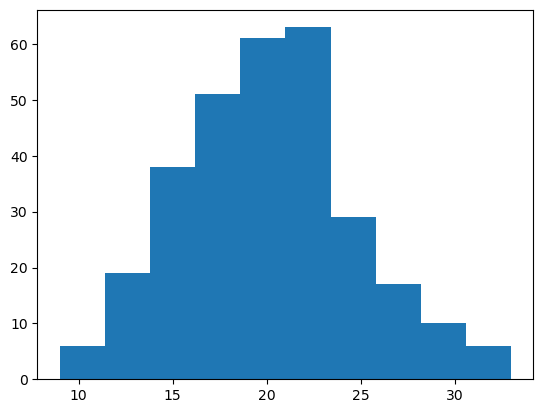

In [26]:
import matplotlib.pyplot as plt

tracker = []

for i in range(300):
    poisson_noise_spike_flag = np.random.binomial(n=1, p=0.02, size=1000)
    tracker.append(sum(poisson_noise_spike_flag))

plt.hist(tracker)

In [29]:
import numpy as np
np.less(3, 2)

False

In [36]:
import numpy as np

def update_matrix(matrix):
    matrix_holder = matrix
    matrix_holder[(0, 0)] = matrix_holder[(0, 0)] + 1000

    return matrix_holder

temp_matrix = np.random.randint(0, 10, size=(10, 10))
print(temp_matrix)

temp_matrix_2 = update_matrix(temp_matrix)

print(temp_matrix)
print()
print(temp_matrix_2)



[[4 3 8 1 9 2 6 6 6 9]
 [4 1 6 3 8 4 7 5 3 3]
 [8 1 8 3 5 5 6 0 1 9]
 [9 0 4 8 6 9 0 0 2 1]
 [2 6 0 9 6 5 7 2 9 6]
 [4 4 1 6 0 5 4 6 7 8]
 [6 9 8 9 2 9 4 9 1 6]
 [1 7 7 4 9 0 6 7 5 3]
 [8 5 6 7 9 5 5 4 8 4]
 [5 2 1 1 2 1 1 9 5 5]]
[[1004    3    8    1    9    2    6    6    6    9]
 [   4    1    6    3    8    4    7    5    3    3]
 [   8    1    8    3    5    5    6    0    1    9]
 [   9    0    4    8    6    9    0    0    2    1]
 [   2    6    0    9    6    5    7    2    9    6]
 [   4    4    1    6    0    5    4    6    7    8]
 [   6    9    8    9    2    9    4    9    1    6]
 [   1    7    7    4    9    0    6    7    5    3]
 [   8    5    6    7    9    5    5    4    8    4]
 [   5    2    1    1    2    1    1    9    5    5]]

[[1004    3    8    1    9    2    6    6    6    9]
 [   4    1    6    3    8    4    7    5    3    3]
 [   8    1    8    3    5    5    6    0    1    9]
 [   9    0    4    8    6    9    0    0    2    1]
 [   2    6    0    9    

In [39]:
import matplotlib.pyplot as plt
import numpy.typing as npt

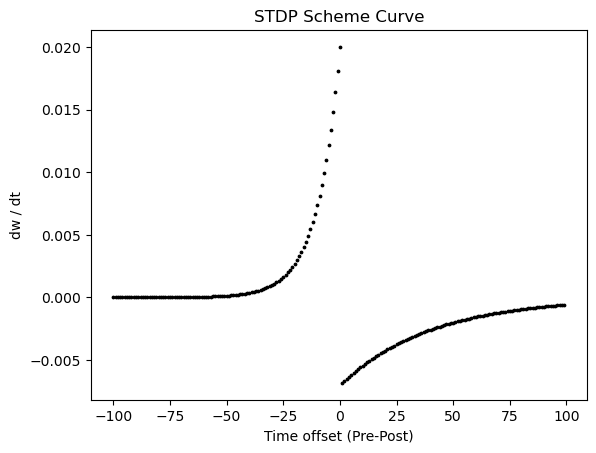

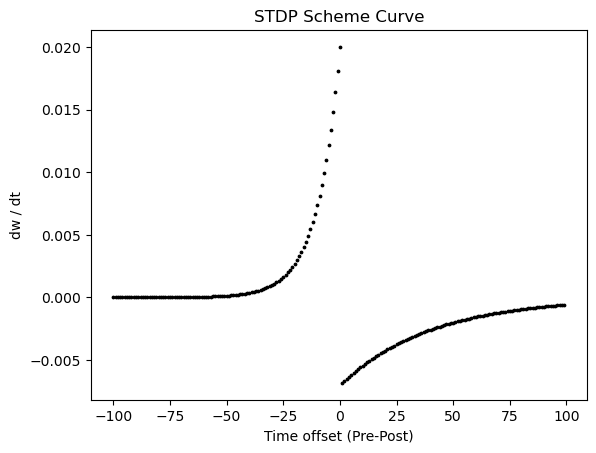

In [58]:
def update_w_matrix(weight_matrix:npt.NDArray, 
                    dw:float, pre_idx:int, post_idx:int) -> npt.NDArray:
  """Update and return the inputted matrix.

  Args:
      weight_matrix (npt.NDArray): _description_
      dw (float): _description_
      pre_idx (int): _description_
      post_idx (int): _description_

  Returns:
      npt.NDArray: _description_
  """
  # Update connection weight
  weight_matrix[(pre_idx, post_idx)] += dw

  # Hard bound to [1, 0]  
  np.clip(weight_matrix[(pre_idx, post_idx)], a_min=0, a_max=1)

  return weight_matrix



def stdp_dw(time_diff:float, scale_factor:float=0.02, 
            stdp_beta:float=1.4, tau_r:float=4,
            tau_plus:float=10, tau_neg:float=None) -> float:
  """Calculate and return connection weight change according to STDP scheme.

  Scaling factor (eta) scales the weight update per spike.
  The default values are set forth by the paper Kromer et. al. (DOI 10.1063/5.0015196)
  and used for the purpose slow STDP and coexistence of desynchronized and 
  oversynchronized states.

  Args: 
    time_diff: [ms] t_{pre} - t_{post}
    scale_factor (float): Scaling factor of the STDP scheme; 0.02 is considered 
      slow STDP. Defaults to 0.02.
    stdp_beta (float): The ratio of overall depression area under curve to 
      potentiation area under curve. Defaults to 1.4
    tau_r (float): Ratio of tau_neg to tau_plus.
    tau_plus (float): [ms] STDP decay timescale for LTP.
    tau_neg (float): [ms] STDP decay timescale for LTD.

  Returns: 
    dw (float): Connection weight change.
  """
  dw = 0

  if (tau_r is None) & (tau_plus is None) & (tau_neg is None):
    raise Exception("tau_r, tau_plus, tau_neg: two of the three have to be provided.")
  elif (tau_r is None) & (tau_plus is None):
    raise Exception("Either tau_r or tau_plus is needed.")
  elif (tau_plus is None) & (tau_neg is None):
    raise Exception("Either tau_plus or tau_neg is needed.")
  elif (tau_neg is None) & (tau_r is None):
    raise Exception("Either tau_neg or tau_r is needed.")
  
  if tau_neg is None:
    tau_neg = tau_r * tau_plus
  elif tau_plus is None: 
    tau_plus = tau_neg / tau_r
  elif tau_r is None: 
    tau_r = tau_neg / tau_plus

  ## Case: LTP (Long-term potentiation)
  if np.less_equal(time_diff, 0):
    dw = (scale_factor 
          * np.exp( time_diff / tau_plus))
  
  ## Case: LTD (Long-term depression)
  if np.greater(time_diff, 0):
    dw = (scale_factor 
          * -(stdp_beta/tau_r) 
          * np.exp( -time_diff / tau_neg ))

  return dw





def visualize_stdp_scheme_assay():
  """Plot the STDP scheme assay.

  Y-axis being the connection weight update (delta w).
  X-axis being the time diff of presynaptic spike timestamp less postsynaptic
  spike timestamp. The definition of time_diff is opposite of time_lag (termed
  in the original paper).
  """
  fig, ax = plt.subplots()
  x = np.arange(-100, 100, 1)
  
  for i in x:
    ax.scatter(x=i, y=stdp_dw(i), c="black", s=3)

  ax.set_title("STDP Scheme Curve")
  ax.set_xlabel("Time offset (Pre-Post)")
  ax.set_ylabel("dw / dt")
  
  return fig

visualize_stdp_scheme_assay()

In [63]:
array_1 = np.random.randint(0, 10, size=5)
array_2 = np.random.randint(0, 10, size=5)

print(array_1, array_2)

print(np.multiply(array_1, array_2))
print(np.dot(array_1, array_2))
print(np.matmul(array_1, array_2))

[4 9 5 6 7] [0 0 4 5 1]
[ 0  0 20 30  7]
57
57


In [90]:
# Mask vs np.multiply vs *

import numpy as np
import time
import tensorflow as tf

n = 1000000
times = 1000

long_array = np.random.randint(0, 10, size=n)
mask = np.random.binomial(n=1, p=0.01, size=n)

print(long_array.shape)
print(mask.shape)

tf_long_array = tf.constant(long_array)
tf_mask = tf.constant(mask)

@tf.function
def tf_multiply(long_array, mask):
    print("Tracing")
    return tf.math.multiply(long_array, mask)
tf_multiply(tf_long_array, tf_mask)  # Warm up

start = time.time()
for _ in range(times):
    result = long_array[mask]
end = (time.time()-start)*100
print(f"{' '*10}{end}ms - mask access time")

start = time.time()
for _ in range(times):
    result = np.multiply(long_array, mask)
end = (time.time()-start)*100
print(f"{' '*10}{end}ms - np.multiply")

start = time.time()
for _ in range(times):
    result = tf_multiply(tf_long_array, tf_mask)
end = (time.time()-start)*100
print(f"{' '*10}{end}ms - tf.math.multiply (after tracing and warming up)")

start = time.time()
for _ in range(times):
    result = long_array * mask
end = (time.time()-start)*1000
print(f"{' '*10}{end}ms - *")


(1000000,)
(1000000,)
Tracing
          101.05111598968506ms - mask access time
          62.51101493835449ms - np.multiply
          242.94209480285645ms - tf.math.multiply (after tracing and warming up)
          604.7718524932861ms - *


In [93]:
# import numba, tensorflow and numpy, load cython
import tensorflow as tf
import numpy as np
from time import time
import functools

def timeit(n=10):
    """
    Decorator to run function n times and print out the total time elapsed.
    """
    def dec(func):
        @functools.wraps(func)
        def wrapped(*args, **kwargs):
            t0 = time()
            for i in range(n):
                func(*args, **kwargs)
            print("%s iterated %d times\nTime elapsed %.3fs\n" % (
                func.__name__, n, time() - t0))
        return wrapped
    return dec

@tf.function
def compute_tf(m, n):
    print('Tracing ',  m,  n)
    x1 = tf.range(0, m-1, 1) ** 2
    x2 = tf.range(0, n-1, 1) ** 2
    return x1[:, None] + x2[None, :]

compute_tf(tf.constant(1), tf.constant(1)) # trace once

def compute_numpy(m, n):
    x1 = np.linspace(0., m-1, m) ** 2
    x2 = np.linspace(0., n-1, n) ** 2
    return x1[:, None] + x2[None, :]

m = 2000
n = 10000
n_loop = 10

timeit(n=n_loop)(compute_numpy)(m, n)
timeit(n=n_loop)(compute_tf)(tf.constant(m), tf.constant(n))

Tracing  Tensor("m:0", shape=(), dtype=int32) Tensor("n:0", shape=(), dtype=int32)
compute_numpy iterated 10 times
Time elapsed 0.412s

compute_tf iterated 10 times
Time elapsed 0.824s



In [94]:
import numpy as np
p = 0.
n = 10000

np.random.poisson(lam=20)

2.0.0


In [99]:
np.ndarray(5, dtype=int)

array([1, 0, 0, 0, 0])

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
from tqdm import tqdm

def generate_poisson_spike_train(lam:int,
                                 n_neurons:int, duration:float,
                                 timestep:float=0.1,
                                 neuron_timescale:float=1) -> npt.NDArray:
    """Generate and return a Poisson Spike Train.

    The Poisson Spike Train assumes the independent spike hypothesis. This 
    generator takes into consideration of the absolute refractory period of a
    neuron and thus prohibits a spike generation during the period.

    Args:
        lam (int): [Hz] Rate or the lambda parameter in a Poisson distribution.
        n_neurons (int): Number of neurons
        duration (float): [ms] The duration or length of the spike train.
        timestep (float, optional): [ms] The timestep used during the  
            Euler-scheme simulation. Defaults to 0.1 [ms].
        neuron_timescale (float, optional): [ms] The time constant of the 
            neuron, also known as the absolute refractory period. Defaults to 1.

    Returns:
        npt.NDArray: euler_steps by n_neurons numpy.ndarray, with 1 denoting a 
            spike and 0 denoting non-spike.
    """
    euler_steps = int(duration / timestep)
    abs_ref_steps = int(neuron_timescale / timestep)
    steps_in_abs_ref = np.zeros((n_neurons,), dtype=int)
    spike_train = np.zeros((euler_steps, n_neurons), dtype=int)

    binomial_n = 1000 / timestep
    binomial_p = lam / binomial_n

    for step in tqdm(np.arange(euler_steps), desc="Generating spike train..."):
        
        # Check if in absolute refractory period of the neuron
        in_abs_ref = np.where(steps_in_abs_ref>0, True, False)
        not_in_abs_ref = np.logical_not(in_abs_ref)

        # Binomial generator (simulating Poisson Spike Train)
        step_spike_trigger = np.random.binomial(n=1, p=binomial_p, size=(n_neurons,))

        # Spike vs No-spike at current Euler-step
        step_spike = np.multiply(step_spike_trigger, not_in_abs_ref, dtype=int)
        spike_train[step, ] = step_spike  # Append to output spike-train placeholder

        # In absolute refractory counter update
        steps_in_abs_ref += np.multiply(step_spike, abs_ref_steps, dtype=int)
        steps_in_abs_ref -= in_abs_ref  # Decrement those that are in abs ref period

        # # DEBUG USE, IGNORE
        # if (np.where(steps_in_abs_ref<0, 1, 0).any()):
        #     raise Exception(f"Negative value detected, "\
        #                     f"something is wrong at euler-step: {step}")
    
    return spike_train

        
for i in range(5):
    print(i, end=" ")
    temp = generate_poisson_spike_train(lam=20, timestep=0.1, n_neurons=5000, duration=1000)
    print(temp.shape)



0 

Generating spike train...: 100%|██████████| 10000/10000 [00:00<00:00, 12731.68it/s]


(10000, 5000)
1 

Generating spike train...: 100%|██████████| 10000/10000 [00:00<00:00, 12606.81it/s]


(10000, 5000)
2 

Generating spike train...: 100%|██████████| 10000/10000 [00:00<00:00, 12738.86it/s]


(10000, 5000)
3 

Generating spike train...: 100%|██████████| 10000/10000 [00:00<00:00, 12770.70it/s]


(10000, 5000)
4 

Generating spike train...: 100%|██████████| 10000/10000 [00:00<00:00, 12860.38it/s]

(10000, 5000)


In [18]:
temp_mat = np.random.randint(0, 10, size=(5, 5))
b = temp_mat
print(temp_mat)

np.shares_memory(b, temp_mat)

temp_mat[(3, )] = [0, 0, 0, 0, 0]
print(temp_mat)
print(b)
np.shares_memory(b, temp_mat)

[[6 0 2 9 4]
 [8 5 3 7 1]
 [3 5 8 3 5]
 [5 8 9 6 6]
 [8 6 2 4 8]]
[[6 0 2 9 4]
 [8 5 3 7 1]
 [3 5 8 3 5]
 [0 0 0 0 0]
 [8 6 2 4 8]]
[[6 0 2 9 4]
 [8 5 3 7 1]
 [3 5 8 3 5]
 [0 0 0 0 0]
 [8 6 2 4 8]]


True

In [25]:
a = np.random.randint(0, 5, (5, ))
print(a)
b = a

# b = b + 3  # new copy
# b += 3  # in place
# b = np.add(b, a) # new copy
# b = np.add(a, b) # new copy
b = np.add(b, a, out=b)  # in place
print(a)
print(b)
print()

[2 2 1 2 1]
[4 4 2 4 2]
[4 4 2 4 2]



In [10]:
import numpy as np
import numpy.ma as ma
x = np.array([1, 2, 3, -1, 5])

mx = ma.masked_array(x, mask=[0, 0, 0, 1, 0])

print(type(mx[3]))

print(x[[False, False, False, True, False]])

<class 'numpy.ma.core.MaskedConstant'>
[-1]


In [11]:
import numpy as np

temp = np.random.randint(0, 10, size=(5, 5))
print(temp)
print()

temp2 = np.asfortranarray(temp)
print(temp)
# print(temp.flags)
print(temp2)
# print(temp2.flags)
# print(np.shares_memory(temp, temp2))
print()

for i in temp:
    print(i)
print()
for i in temp2:
    print(i)

[[7 2 8 7 9]
 [7 7 2 5 2]
 [4 4 4 6 0]
 [2 3 7 2 0]
 [3 4 9 1 3]]

[[7 2 8 7 9]
 [7 7 2 5 2]
 [4 4 4 6 0]
 [2 3 7 2 0]
 [3 4 9 1 3]]
[[7 2 8 7 9]
 [7 7 2 5 2]
 [4 4 4 6 0]
 [2 3 7 2 0]
 [3 4 9 1 3]]

[7 2 8 7 9]
[7 7 2 5 2]
[4 4 4 6 0]
[2 3 7 2 0]
[3 4 9 1 3]

[7 2 8 7 9]
[7 7 2 5 2]
[4 4 4 6 0]
[2 3 7 2 0]
[3 4 9 1 3]


In [5]:
import numpy as np


mat_1 = np.random.random((5, 5))
mat_2 = np.random.binomial(n=1, p=0.5, size=(5, 5))

print(f"mat_1:\n{mat_1}")
print(f"mat_2:\n{mat_2}")

print(f"multiplied:\n{np.multiply(mat_1, mat_2)}")

mat_1:
[[0.05911009 0.90578247 0.87800021 0.23431468 0.81571242]
 [0.30422919 0.75817754 0.19806933 0.67305687 0.62479067]
 [0.2897568  0.37776013 0.29555875 0.72877701 0.77637483]
 [0.02250382 0.40750942 0.86130042 0.58229166 0.53749393]
 [0.69994034 0.00900931 0.406938   0.77893536 0.37140703]]
mat_2:
[[0 1 0 1 0]
 [1 1 0 0 0]
 [0 1 0 1 1]
 [1 1 0 1 1]
 [0 0 0 1 1]]
multiplied:
[[0.         0.90578247 0.         0.23431468 0.        ]
 [0.30422919 0.75817754 0.         0.         0.        ]
 [0.         0.37776013 0.         0.72877701 0.77637483]
 [0.02250382 0.40750942 0.         0.58229166 0.53749393]
 [0.         0.         0.         0.77893536 0.37140703]]


In [10]:
import numpy as np

temp_mat = np.random.randint(0, 10, size=(5, 5))
print(temp_mat)

print(temp_mat[2, 4])

[[5 0 7 9 2]
 [5 3 9 1 4]
 [4 1 1 4 0]
 [8 6 3 0 7]
 [7 3 6 9 8]]
0


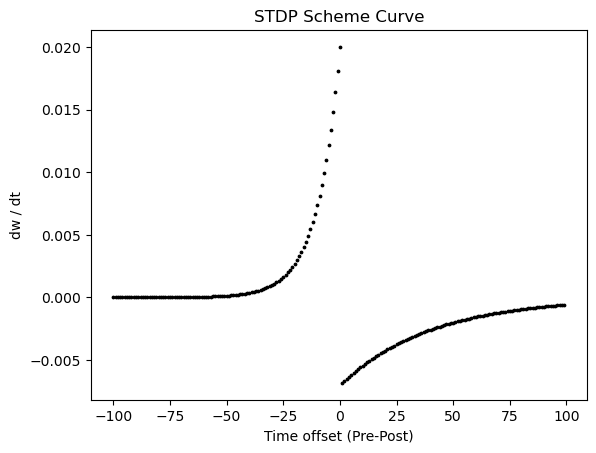

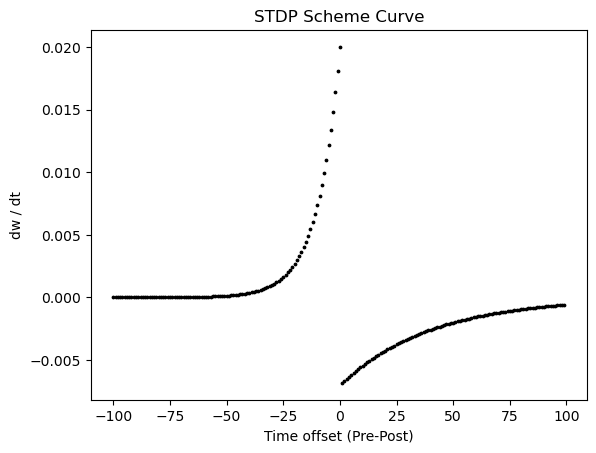

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def stdp_dw(time_diff:float, scale_factor:float=0.02, 
            stdp_beta:float=1.4, tau_r:float=4,
            tau_plus:float=10, tau_neg:float=None) -> float:
  """Calculate and return connection weight change according to STDP scheme.

  Scaling factor (eta) scales the weight update per spike.
  The default values are set forth by the paper Kromer et. al. (DOI 10.1063/5.0015196)
  and used for the purpose slow STDP and coexistence of desynchronized and 
  oversynchronized states.

  Args: 
    time_diff: [ms] t_{pre} - t_{post}
    scale_factor (float): Scaling factor of the STDP scheme; 0.02 is considered 
      slow STDP. Defaults to 0.02.
    stdp_beta (float): The ratio of overall depression area under curve to 
      potentiation area under curve. Defaults to 1.4
    tau_r (float): Ratio of tau_neg to tau_plus.
    tau_plus (float): [ms] STDP decay timescale for LTP.
    tau_neg (float): [ms] STDP decay timescale for LTD.

  Returns: 
    dw (float): Connection weight change.
  """
  dw = 0

  if (tau_r is None) & (tau_plus is None) & (tau_neg is None):
    raise Exception("tau_r, tau_plus, tau_neg: two of the three have to be provided.")
  elif (tau_r is None) & (tau_plus is None):
    raise Exception("Either tau_r or tau_plus is needed.")
  elif (tau_plus is None) & (tau_neg is None):
    raise Exception("Either tau_plus or tau_neg is needed.")
  elif (tau_neg is None) & (tau_r is None):
    raise Exception("Either tau_neg or tau_r is needed.")
  
  if tau_neg is None:
    tau_neg = tau_r * tau_plus
  elif tau_plus is None: 
    tau_plus = tau_neg / tau_r
  elif tau_r is None: 
    tau_r = tau_neg / tau_plus

  ## Case: LTP (Long-term potentiation)
  if np.less_equal(time_diff, 0):
    dw = (scale_factor 
          * np.exp( time_diff / tau_plus))
  
  ## Case: LTD (Long-term depression)
  if np.greater(time_diff, 0):
    dw = (scale_factor 
          * -(stdp_beta / tau_r) 
          * np.exp( -time_diff / tau_neg ))

  return dw

def visualize_stdp_scheme_assay():
  """Plot the STDP scheme assay.

  Y-axis being the connection weight update (delta w).
  X-axis being the time diff of presynaptic spike timestamp less postsynaptic
  spike timestamp. The definition of time_diff is opposite of time_lag (termed
  in the original paper).
  """
  fig, ax = plt.subplots()
  x = np.arange(-100, 100, 1)
  
  for i in x:
    ax.scatter(x=i, y=stdp_dw(i), c="black", s=3)

  ax.set_title("STDP Scheme Curve")
  ax.set_xlabel("Time offset (Pre-Post)")
  ax.set_ylabel("dw / dt")

  return fig

visualize_stdp_scheme_assay()

In [2]:
import numpy as np

temp_array = np.random.randint(0, 2, size=10)
print(temp_array)

mask = (temp_array==1)
print(mask)


np.shares_memory(temp_array, mask)

[1 1 1 0 0 0 1 1 0 0]
[ True  True  True False False False  True  True False False]


False

In [12]:
import numpy as np

num_array = np.arange(30)
print(num_array)

print(num_array >= 5)

print(np.argmax(num_array >= 5))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
5


In [44]:

spike_record = np.random.randint(0, 10, size=(20, 2))
print(spike_record)
# mask = np.less_equal(spike_record[:, 0], 5)
# mask2 = tuple(np.where(spike_record[:, 0] <= 5)[0])
mask3 = spike_record[:, 0] <= 5

print(mask3)

basic_or_advance = spike_record[mask3]
print(basic_or_advance)

np.shares_memory(spike_record, basic_or_advance)

[[0 9]
 [0 9]
 [7 8]
 [0 7]
 [8 1]
 [0 0]
 [2 0]
 [4 0]
 [1 4]
 [3 6]
 [1 5]
 [9 5]
 [5 8]
 [3 3]
 [4 8]
 [6 5]
 [9 0]
 [3 5]
 [4 9]
 [6 5]]
[ True  True False  True False  True  True  True  True  True  True False
  True  True  True False False  True  True False]
[[0 9]
 [0 9]
 [0 7]
 [0 0]
 [2 0]
 [4 0]
 [1 4]
 [3 6]
 [1 5]
 [5 8]
 [3 3]
 [4 8]
 [3 5]
 [4 9]]


False

[[0.15707457 0.70814509 0.57704786 0.13659733 0.76542102 0.63784697
  0.00528994 0.90834174 0.96703771 0.4514597 ]
 [0.32845471 0.84651208 0.18965705 0.42693039 0.76008756 0.59227076
  0.46885309 0.08753677 0.57839593 0.46815967]
 [0.22955154 0.03657466 0.09185001 0.91162443 0.51277842 0.94754906
  0.63842705 0.05398099 0.9378304  0.80612958]
 [0.81742227 0.08077498 0.26666278 0.18320332 0.5551602  0.8911482
  0.54227214 0.58238929 0.87340026 0.921886  ]
 [0.97418446 0.25164204 0.7424536  0.93649637 0.40695673 0.93346731
  0.67276018 0.18780015 0.5036295  0.05656893]]


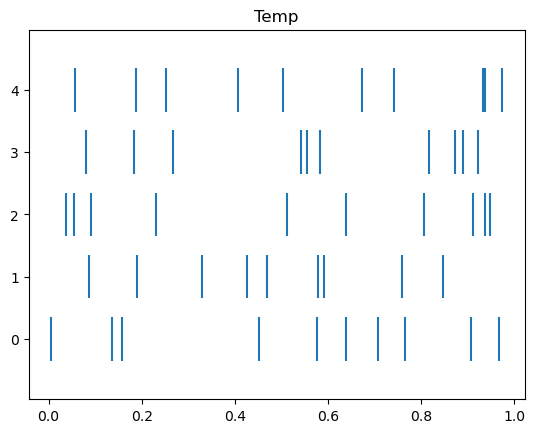

In [60]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

spike_train = np.random.random(size=(5, 10))
print(spike_train)

ax.eventplot(spike_train, linelengths=0.7)
ax.set_title("Temp")
plt.show()


Simulate Call - EulerScheme Calcaultions: 100%|██████████| 2000/2000 [00:06<00:00, 314.06it/s]


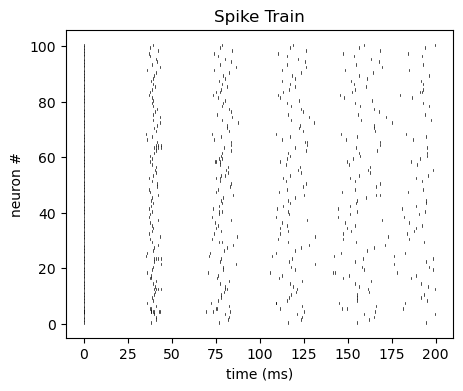

array([[  0. ,   0. ],
       [  1. ,   0. ],
       [  2. ,   0. ],
       ...,
       [  3. , 199.5],
       [ 12. , 199.5],
       [100. , 199.5]])

In [1]:
import src.model as mod
lif_ = mod.LIF_Network(n_neurons=700)

print(lif_)

lif_.simulate(sim_duration=200)

lif_.spikeTrain(first_n_neurons=100)

In [2]:
from src.model.copied_from_ipynb_discussion_with_jesse import LIF_Network as lif

lifnn = lif(n_neurons=300)

for 
_ = lifnn.simulate(timesteps=100)

In [1]:
from src.model import lifNetwork as mod1
from src.model import lifNetwork_release_v_0_2 as mod2
from time import perf_counter

lif1 = mod1.LIF_Network(500)
lif2 = mod2.LIF_Network(500)

print("lif1")
print(f"mean_w: {lif1.calc_nn_mean_w()}")
start = perf_counter()
lif1.simulate(1000)
end = perf_counter()
print(f"Time lapsed: {end-start} sec")
print()

print("lif2")
print(f"mean_w: {lif2.calc_nn_mean_w()}")
start = perf_counter()
lif2.simulate(1000)
end = perf_counter()
print(f"Time lapsed: {end-start} sec")
print()

lif1
mean_w: 0.5
Time lapsed: 4.118309500001487 sec

lif2
mean_w: 0.5
Time lapsed: 11.0840530830028 sec



In [4]:
## Testing nested-for-loop vs Sparse-array methods

import numpy as np
from scipy import sparse
from numba import jit
from time import perf_counter

size = (1000, 1000)

s_flag = np.random.randint(0, 2, size=size[0])
conn_mat = sparse.csr_array(np.random.randint(0, 2, size=size))

sparse_holder = []
loop_holder = []




## Testing some smart sparse array method
start = perf_counter()
rows = np.argwhere(s_flag == 1).flatten()
for i in rows:
    cols = conn_mat.indices[conn_mat.indptr[i] : conn_mat.indptr[i+1]]
    for j in cols:
        # sparse_holder.append(conn_mat[i, j])
        sparse_holder.append((i, j))
        # print(conn_mat[i, j])
end = perf_counter()
sparse_method_time = end-start
print(f"sparse-array method: {(sparse_method_time):e} sec")




## Testing nested for-loop method
start = perf_counter()
for i in range(size[0]):
    if s_flag[i] == 1:
        for j in range(size[1]):
            if conn_mat[i, j] == 1:
                # loop_holder.append(conn_mat[i, j])
                loop_holder.append((i, j))
                # print(conn_mat[i, j])
end = perf_counter()
loop_method_time = end-start
print(f"for-loop time: {(loop_method_time):e} sec")




## Ensure that their reuslts are the same
assert len(sparse_holder) == len(loop_holder), "The two methods' results are not the same."
assert np.array_equal(sparse_holder, loop_holder), "The two results are not equal."

if sparse_method_time < loop_method_time:
    print(f"Sparse wins by {loop_method_time - sparse_method_time}")
elif sparse_method_time > loop_method_time:
    print(f"Loop wins by {sparse_method_time - loop_method_time}")
else: 
    print("Tie")




sparse-array method: 2.498675e-02 sec
for-loop time: 3.459404e+00 sec
Sparse wins by 3.4344169580144808
